# Analysing HDB resale prices

First we import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Lets check for any NA values

In [2]:
df = pd.read_csv('ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

Lets take a look at the resale price data from 2017 onwards

In [3]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


Lets find out the maximum and minimum resale flat price.

In [4]:
df['resale_price'].max()

1588000.0

In [5]:
df['resale_price'].min()

140000.0

What are the flats transacted at the maximum and minimum price?

In [6]:
df[df['resale_price'] == df['resale_price'].max()]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
181260,2024-06,BUKIT MERAH,5 ROOM,9B,BOON TIONG RD,34 TO 36,112.0,Improved,2016,90 years 08 months,1588000.0
181265,2024-06,BUKIT MERAH,5 ROOM,96A,HENDERSON RD,46 TO 48,113.0,Improved,2019,94 years,1588000.0


In [7]:
df[df['resale_price'] == df['resale_price'].min()]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
67560,2020-02,TOA PAYOH,3 ROOM,26,TOA PAYOH EAST,10 TO 12,67.0,Improved,1971,49 years 11 months,140000.0


## When will we get the first $2 million resale flat?

First, we will extract the maximum resale flat price for each year and month

In [8]:
df_2mil = pd.DataFrame()
df_2mil['year_month'] = df['month']
df_2mil['resale_price'] = df['resale_price']

df_2mil = df_2mil.groupby('year_month').max().reset_index()
df_2mil['month'] = pd.Series(range(0,160))
df_2mil.tail()

,year_month,resale_price,month
86,2024-03,1450000.0,86
87,2024-04,1438000.0,87
88,2024-05,1515000.0,88
89,2024-06,1588000.0,89
90,2024-07,1568000.0,90


Next, lets plot a scatter graph.

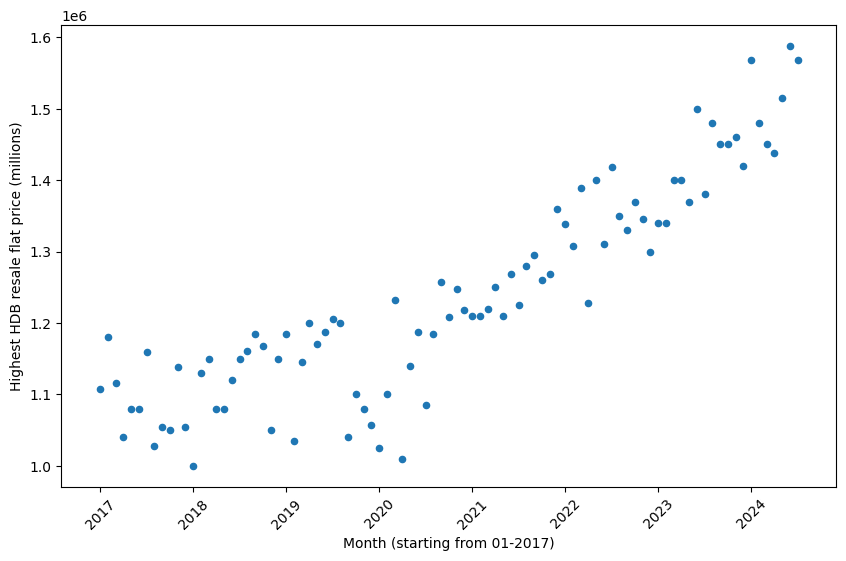

In [9]:
fig_2mil, ax_2mil = plt.subplots(figsize=(10,6))

df_2mil.plot(kind='scatter', x='year_month', y='resale_price', ax=ax_2mil, xlabel='Month (starting from 01-2017)', ylabel='Highest HDB resale flat price (millions)')
ax_2mil.set_xticks(range(0, 160, 12), labels=[2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030], rotation=45);
ax_2mil.set_xlim(-5, 95);

Let's plot a linear regression to extrapolate the line of best fit. I will use data from 2021 onwards since it is after the pandemic.

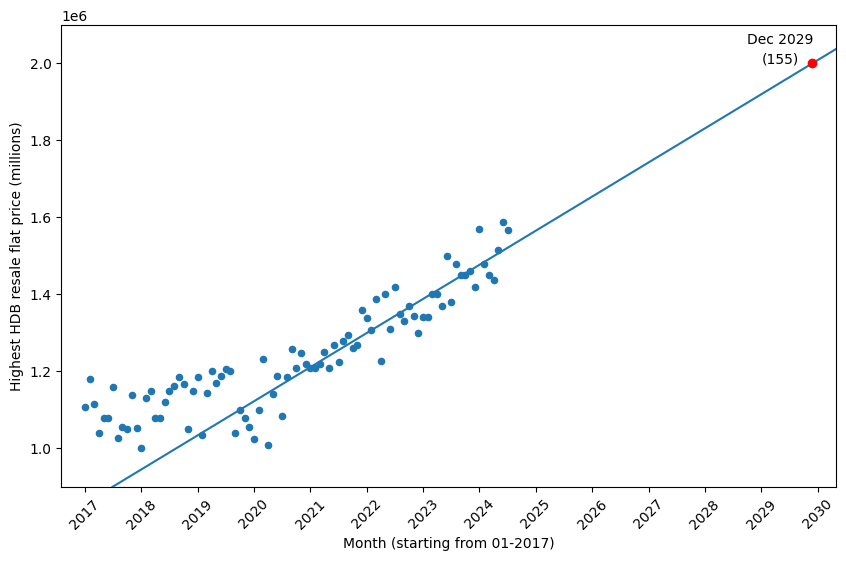

In [10]:
slope, intercept, r, p, se = stats.linregress(x=df_2mil[df_2mil['month'] >= 48]['month'], y=df_2mil[df_2mil['month'] >= 48]['resale_price'])

ax_2mil.axline((0, intercept), slope=slope)
ax_2mil.set_xlim(-5, 160)
ax_2mil.set_ylim(900000, 2100000)
ax_2mil.plot(((2000000 - intercept) / slope), 2000000, 'ro')
ax_2mil.text(144, 2000000, f'({round((2000000 - intercept) / slope)})')
ax_2mil.text(141, 2050000, f'Dec 2029')

fig_2mil

When we extrapolate the line of best fit, it seems like the first 2 million SGD resale flat will happen on the 155th month from January 2017, which is around <b>December 2029</b>.

## HDB flat resale price by town

Let's find out how location affects HDB resale prices and which towns have the highest and lowest resale prices.

First, we create a new database grouping by each town and taking the median of resale price from 2024.

In [11]:
df_town = df[df['month'].str.split('-').str[0] == '2024'].groupby('town')['resale_price'].median().sort_values(ascending=False)
df_town

town
BUKIT TIMAH        955000.0
BISHAN             790000.0
BUKIT MERAH        773500.0
KALLANG/WHAMPOA    688000.0
PASIR RIS          685000.0
QUEENSTOWN         650000.0
SERANGOON          639888.0
PUNGGOL            630000.0
TAMPINES           630000.0
SENGKANG           610000.0
TOA PAYOH          580000.0
BUKIT PANJANG      578000.0
HOUGANG            576000.0
BUKIT BATOK        570500.0
SEMBAWANG          570000.0
WOODLANDS          555900.0
CENTRAL AREA       555000.0
CHOA CHU KANG      548000.0
GEYLANG            530000.0
YISHUN             521000.0
CLEMENTI           520000.0
MARINE PARADE      515000.0
JURONG WEST        510000.0
BEDOK              488000.0
JURONG EAST        474000.0
ANG MO KIO         465000.0
Name: resale_price, dtype: float64

Next, we plot a bar graph showing the data.

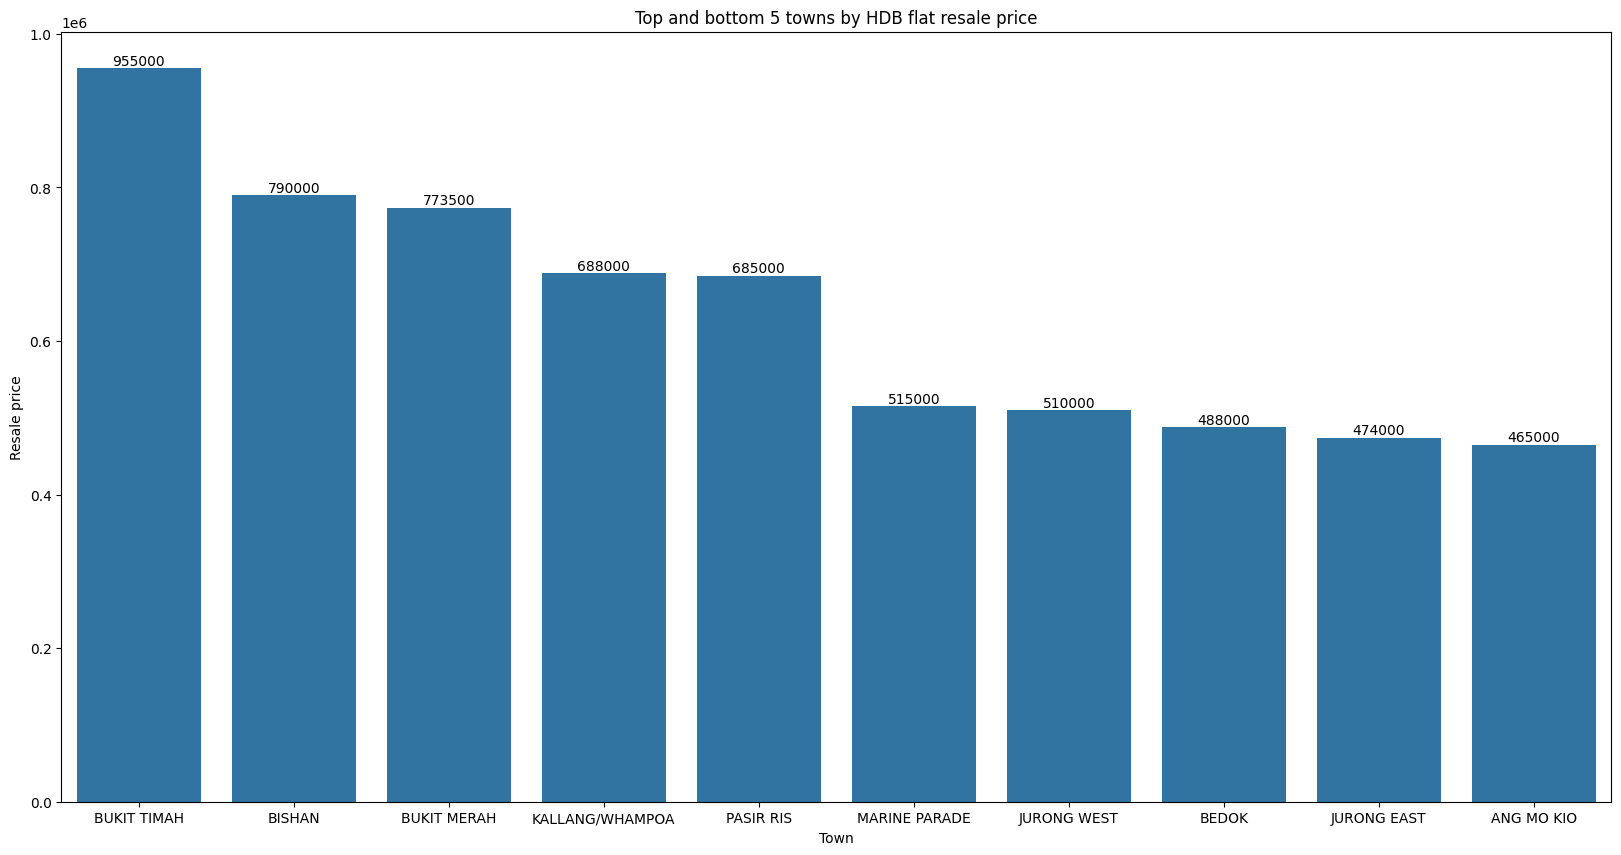

In [12]:
df_town = pd.concat([df_town.head(5), df_town.tail(5)])

fig_town, ax_town = plt.subplots(figsize=(20,10))

sns.barplot(df_town, ax=ax_town);
ax_town.bar_label(ax_town.containers[0], fontsize=10);
ax_town.set_xlabel('Town');
ax_town.set_ylabel('Resale price');
ax_town.set_title('Top and bottom 5 towns by HDB flat resale price');

Looks like the hottest town with the highest resale price goes to Bukit Timah, at a median price of $955,000. The town with the lowest resale price is Ang Mo Kio, with a median price of $465,000. 